In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten

In [2]:
train_dir = 'Data/train'
validate_dir = 'Data/valid'

label = ['cat', 'chicken', 'cow', 'crab', 'dog', 'elephant', 'horse', 'whale']

train_data_gen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_data_gen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    class_mode='categorical'
)

validation_generator = validation_data_gen.flow_from_directory(
    validate_dir,
    target_size=(200, 200),
    class_mode='categorical'
)

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

Found 1680 images belonging to 8 classes.
Found 480 images belonging to 8 classes.


e:\Python_code\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [3]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8, activation='softmax'))

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    #optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x=train_generator,
    validation_data=validation_generator,
    batch_size=32,
    epochs=30
)

model.save('model_1.h5')

Epoch 1/30


e:\Python_code\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.1918 - loss: 4.8261 - val_accuracy: 0.3271 - val_loss: 1.7420
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.2845 - loss: 1.7646 - val_accuracy: 0.3625 - val_loss: 1.5902
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.3667 - loss: 1.6283 - val_accuracy: 0.4479 - val_loss: 1.4564
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4374 - loss: 1.4690 - val_accuracy: 0.5479 - val_loss: 1.2322
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5008 - loss: 1.3971 - val_accuracy: 0.5708 - val_loss: 1.2340
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5549 - loss: 1.1951 - val_accuracy: 0.6000 - val_loss: 1.1077
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5886 - loss: 1.0814 - val_accuracy: 0.6167 - val_loss: 1.0258
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6061 - loss: 1.0800 - val_accuracy: 0.5625 - val_loss: 1.3108
Epo

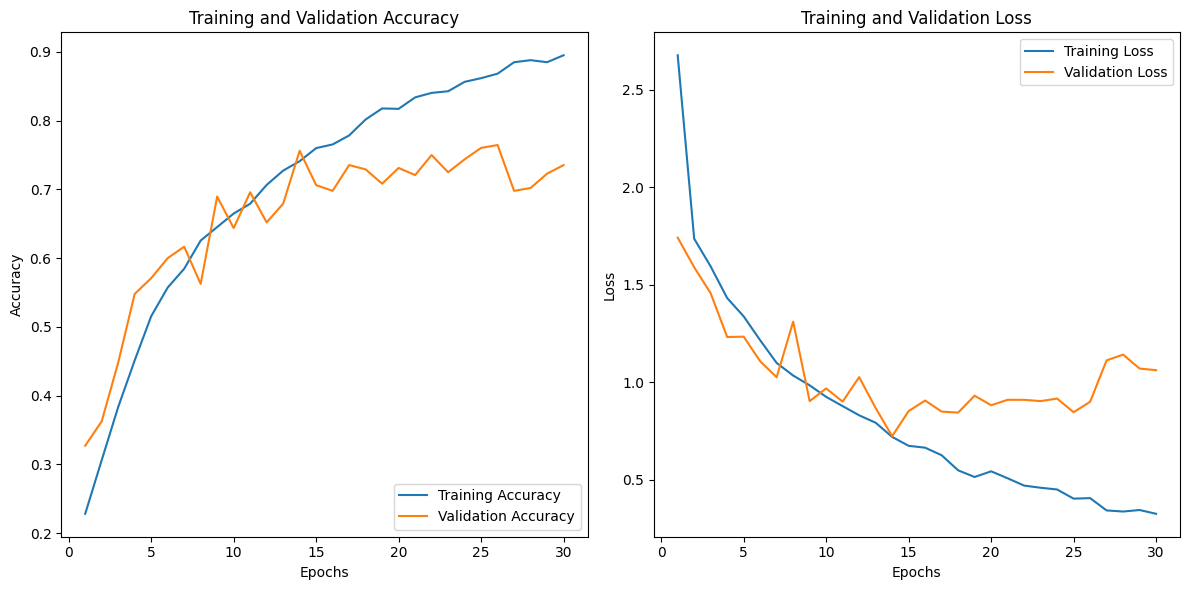

In [4]:

# Plot and visualize training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()
